In [38]:
import librosa as lr
import numpy as np
import librosa.display as display
import matplotlib.pyplot as plt
from skimage.io import imshow, imsave

In [64]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    X_scaled = X_scaled[:, :1248]
    return X_scaled.astype(np.uint8)

In [65]:
def get_mel_spec(path_sound, path_img):
    y, sr = lr.load(path_sound)
    S = lr.feature.melspectrogram(y=y, sr=sr, hop_length=512, win_length=1024)
    S_dB = lr.power_to_db(S, ref=np.max)
    img = scale_minmax(S_dB, 0, 255)
    img = np.flip(img, axis=0)
    imsave(path_img, img)
    imshow(img, cmap='gray')


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


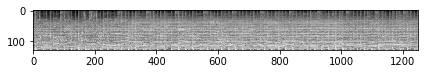

In [66]:
get_mel_spec('../data/fma_small/000/000010.mp3', '../data/spectrograms/5.png')

/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


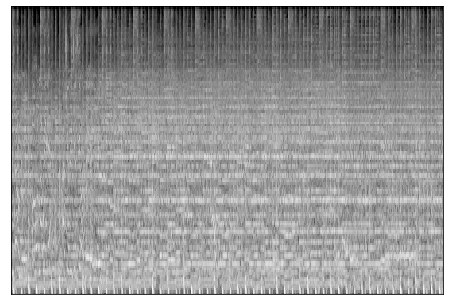

In [111]:
get_mel_spec('../data/fma_small/000/000010.mp3', '../data/spec/3.png')

/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


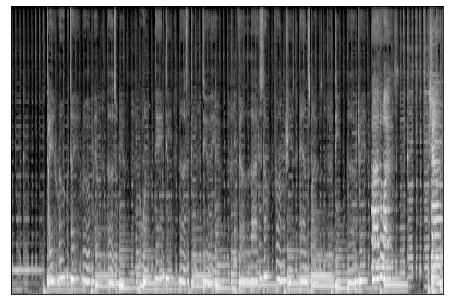

In [112]:
get_mel_spec('../data/fma_small/000/000140.mp3', '../data/spec/4.png')

In [67]:
y, sr = lr.load('../data/fma_small/104/104356.mp3')

/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [68]:
S = lr.feature.melspectrogram(y=y, sr=sr, hop_length=512, win_length=1024)

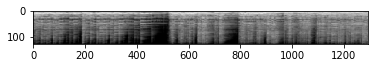

In [69]:

fig, ax = plt.subplots()
S_dB = lr.power_to_db(S, ref=np.max)
# img = display.specshow(S_dB, cmap='gray', sr=sr,
#                          fmax=8000, ax=ax)
# fig.colorbar(img, ax=ax, format='%+2.0f dB')
# ax.set(title='Mel-frequency spectrogram')
plt.imshow(S_dB, cmap='gray')
plt.savefig('../123.png')
plt.show()

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


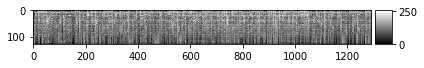

In [41]:
spec = scale_minmax(S_dB, 0, 255)
imsave('../321.png', spec)
imshow(spec, cmap='gray')


In [54]:
spec.max()

255.0

In [51]:
2 ** 8

256

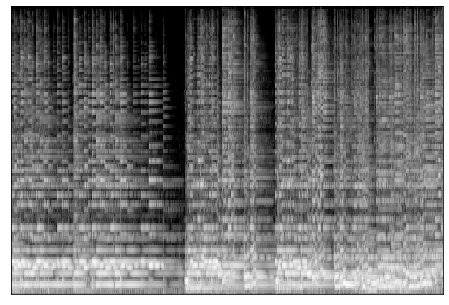

In [70]:

fig, ax = plt.subplots(1)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
S_dB = lr.power_to_db(S, ref=np.max)
img = display.specshow(S_dB, cmap='gray', sr=sr, fmax=8000)
# fig.colorbar(img, ax=ax, format='%+2.0f dB')
# ax.set(title='Mel-frequency spectrogram')
plt.savefig('../123.png')
plt.show()

In [9]:
len(y) / 512

1290.984375

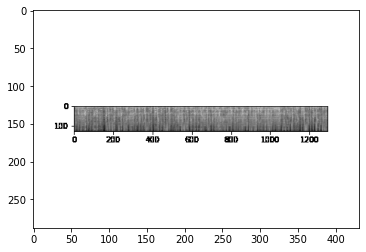

In [17]:
from PIL import Image
fname = '../123.png'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [18]:
arr.shape

(288, 432)

In [62]:
np.array([254.9]).astype(np.uint8)

array([254], dtype=uint8)

In [63]:
29 * 22050 / 512

1248.92578125